In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


In [52]:
data = pd.read_csv("MSFT.csv")
print(data.head(1))
print(data.info())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061434  1031788800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB
None


In [53]:
# Converting date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Using loc[] with square brackets, not parentheses
prediction = data.loc[
    (data['Date'] > pd.to_datetime('2013-01-01')) & 
    (data['Date'] < pd.to_datetime('2018-01-01'))
]

print(f"Shape of filtered data: {prediction.shape}")
prediction.head(1)


Shape of filtered data: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
6759,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.940649,52899300
6760,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.633337,48294400
6761,2013-01-04,27.270000,27.340000,26.730000,26.740000,22.209740,52521100
6762,2013-01-07,26.770000,26.879999,26.639999,26.690001,22.168213,37110400
6763,2013-01-08,26.750000,26.790001,26.459999,26.549999,22.051929,44703100


In [54]:
data=pd.read_csv("MSFT.csv")
print(data.head(1))
print(data.info()) 


         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061434  1031788800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB
None


#Initial Date Visualization
#Plot 1 - Open and Close Price of time

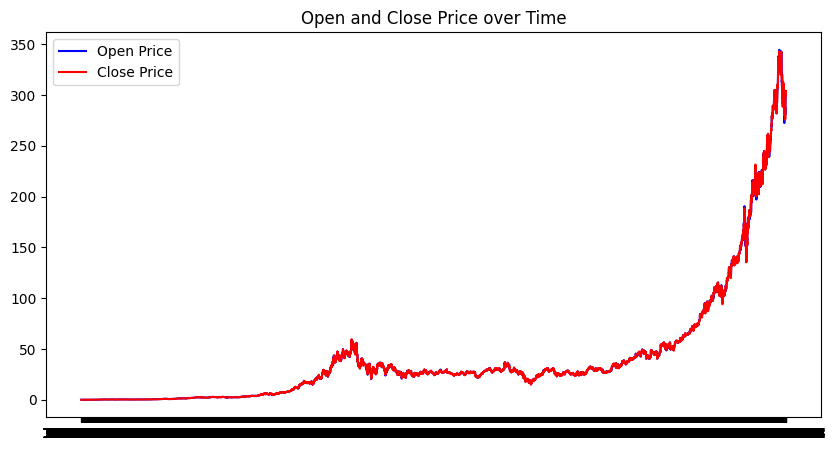

In [15]:
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Open'], label='Open Price' , color='blue')
plt.plot(data['Date'], data['Close'], label='Close Price' , color='red')
plt.title('Open and Close Price over Time')
plt.legend()
#plt.show()

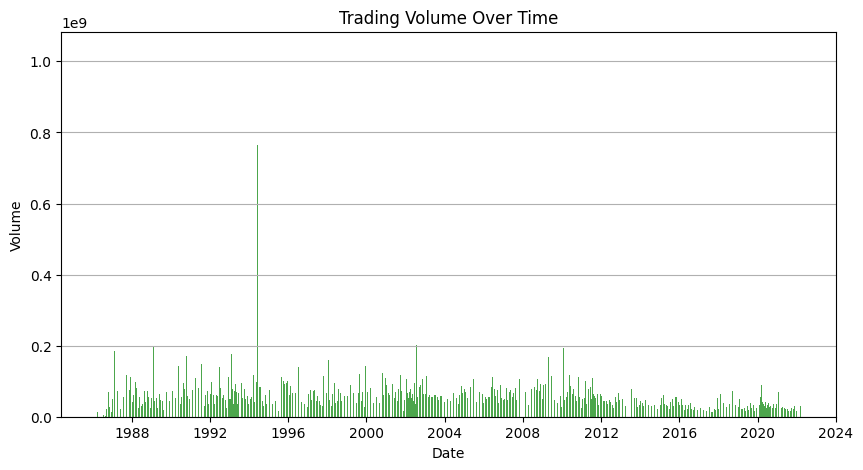

In [74]:
# Plot 2 -Trading Volume (check for outliers)

plt.figure(figsize=(10,5))
plt.bar(data['Date'], data['Volume'], color='green', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, axis='y')
#plt.show()

In [55]:
#drop non-numeric columns

numeric_date=data.select_dtypes(include=["int64", "float64"])
#numeric_date.isnull().sum()

Text(0.5, 1.0, 'Corelation')

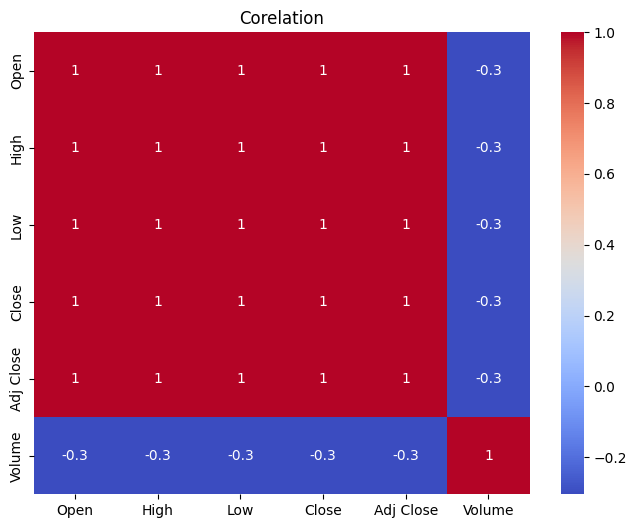

In [24]:
#Check the correlation between the columns
plt.figure(figsize=(8,6))
sns.heatmap(numeric_date.corr(), annot=True, cmap="coolwarm")
plt.title("Corelation")
#plt.show()

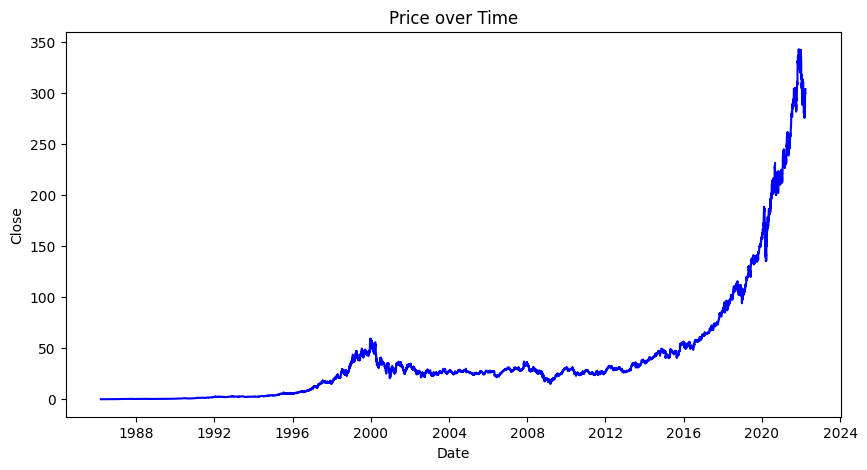

In [32]:
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], color='blue')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Price over Time')
plt.show()

In [57]:
# Prepair for the LSTM Model (Sequential)

stock_close = data.filter(['Close'])
dataset = stock_close.values   # convert to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95 ))

In [58]:
# Preprocessing Stages
scaler=StandardScaler()
scaled_data= scaler.fit_transform(dataset)

training_data = scaled_data[: training_data_len]

X_train , y_train = [] , []

# Creat a sliding window for our stock (60 days)

for i in range(60 , len(training_data)):
    X_train.append(training_data[i-60: i , 0])
    y_train.append(training_data[i,0])

X_train , y_train = np.array(X_train) , np.array(y_train)


#LSTM requires 3D input in the format: [samples, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] , 1))

In [59]:
# Build the Model
model = keras.models.Sequential()

In [60]:
# First Layer
model.add(keras.layers.LSTM(64, return_sequences = True , input_shape=(X_train.shape[1], 1)))

# Second Layer
model.add(keras.layers.LSTM(64, return_sequences = False))

# Third Layer
model.add(keras.layers.Dense(128 , activation = 'relu'))

#Fourth Layer
model.add(keras.layers.Dropout(0.5))

#Final Output Layer
model.add(keras.layers.Dense(1))

/home/samaneh/projects/TSA_LSTM/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
model.summary()

model.compile(optimizer = "adam", loss = "mae", metrics = [keras.metrics.RootMeanSquaredError()])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 40s 149ms/step - loss: 0.0430 - root_mean_squared_error: 0.0776
Epoch 2/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - loss: 0.0419 - root_mean_squared_error: 0.0765
Epoch 3/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 0.0406 - root_mean_squared_error: 0.0751
Epoch 4/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - loss: 0.0408 - root_mean_squared_error: 0.0745
Epoch 5/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - loss: 0.0410 - root_mean_squared_error: 0.0767
Epoch 6/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - loss: 0.0398 - root_mean_squared_error: 0.0743
Epoch 7/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - loss: 0.0414 - root_mean_squared_error: 0.0782
Epoch 8/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - loss: 0.0401 - root_mean_squared_error: 0.0765
Epoch 9/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - loss: 0.0395 - root_mean_squared_error: 0.0728
Epoch 10/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - loss: 0.0402 -

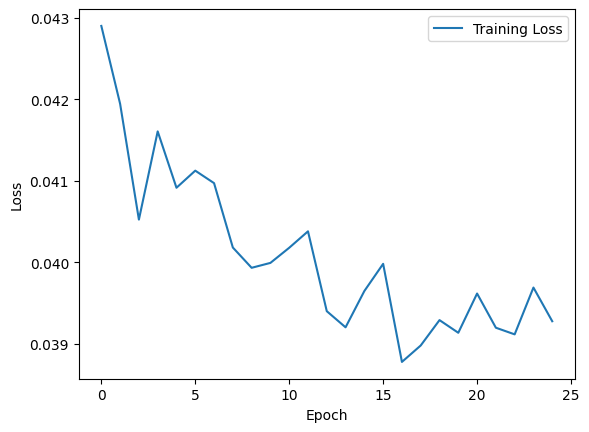

268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step


In [64]:
training = model.fit(X_train , y_train , epochs = 25 , batch_size = 32)

# Plot the training loss
plt.plot(training.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on training data
train_predictions = model.predict(X_train)

#Prep the test data
test_data = scaled_data[training_data_len - 60 : ]
X_test = []
y_test = dataset[training_data_len :]

for i in range(60 , len(test_data)):
    X_test.append(test_data[i-60: i , 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] , 1))

In [70]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ -1s -54631us/step


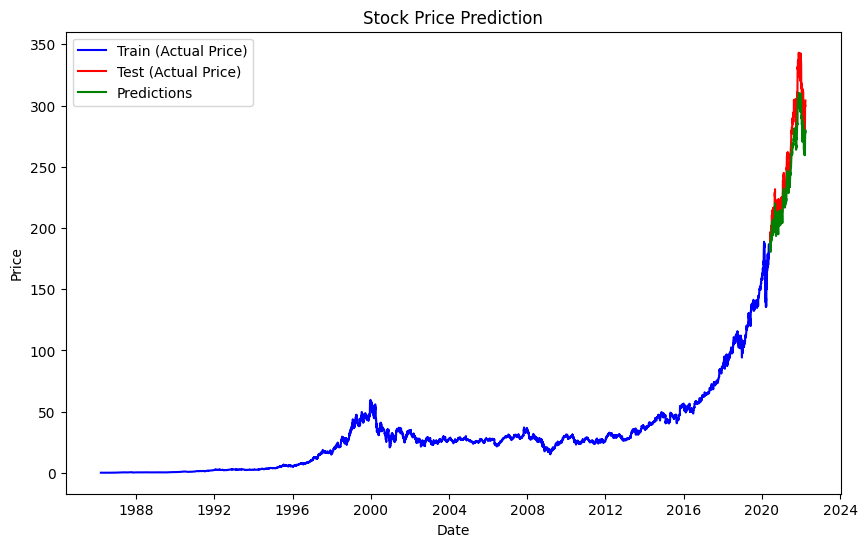

In [73]:
# Plotting data
train = data[:training_data_len]
test = data[training_data_len:]

# Add predictions to test dataframe
test = test.copy()
test['Predictions'] = predictions

plt.figure(figsize=(10,6))
plt.plot(train['Date'], train['Close'], label='Train (Actual Price)', color='blue')
plt.plot(test['Date'], test['Close'], label='Test (Actual Price)', color='red')
plt.plot(test['Date'], test['Predictions'], label='Predictions', color='green')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
